In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json_lines
%matplotlib inline

In [2]:
with open('Crowd/web_results/users.json') as f:
    items = [i for i in json_lines.reader(f)]
df = pd.io.json.json_normalize(items)
df.drop(['__v', '_id.$oid', 'updatedAt.$date'], inplace=True, axis=1)
# df.columns = ['ip', 'browser', 'seed_id', 'user_id', 'id', 'created_at', 'date']
df.columns = ['browser', 'created_at', 'ip', 'id', 'seed_id', 'user_id']
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df.head()

,browser,created_at,ip,id,seed_id,user_id,date
0,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2018-06-25 13:17:36.861,34.203.194.238,1,100008056815598,,2018-06-25
1,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2018-06-25 13:17:37.830,54.167.90.175,1,100008056815598,,2018-06-25
2,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,2018-06-25 13:18:01.457,173.252.85.29,1,,,2018-06-25
3,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2018-06-25 13:23:26.463,54.175.114.21,2,100008056815598,,2018-06-25
4,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2018-06-25 13:24:02.661,54.243.18.115,3,100008056815598,,2018-06-25


In [3]:
df.columns

Index(['browser', 'created_at', 'ip', 'id', 'seed_id', 'user_id', 'date'], dtype='object')

In [4]:
# df = pd.read_csv('Crowd/web_results/users.csv', dtype={'src_id': np.object, 'user_id': np.object}, parse_dates=[5])
# df['date'] = df['createdAt'].dt.date
# df.columns = ['ip', 'browser', 'seed_id', 'user_id', 'id', 'created_at', 'date']
# df.head()

In [4]:
df.shape

(222, 7)

In [5]:
df = df[~df['browser'].str.contains('prerender')]
df.shape

(87, 7)

In [6]:
df

,browser,created_at,ip,id,seed_id,user_id,date
2,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,2018-06-25 13:18:01.457,173.252.85.29,1,,,2018-06-25
10,Mozilla/5.0 (iPhone; CPU iPhone OS 11_1_2 like...,2018-06-27 14:03:57.753,69.171.224.208,2,,,2018-06-27
15,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,2018-06-27 16:01:40.836,173.252.89.24,1,100004289191786,,2018-06-27
16,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,2018-06-27 16:07:47.076,31.13.114.48,3,100003246562216,,2018-06-27
18,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,2018-06-27 16:32:04.902,173.252.122.61,3,,,2018-06-27
19,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2018-06-27 17:38:14.923,181.113.81.131,2,100001924890299,,2018-06-27
20,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,2018-06-27 21:20:37.646,143.255.248.3,2,100001924890299,,2018-06-27
21,Mozilla/5.0 (Linux; Android 5.1.1; Alcatel_406...,2018-06-28 00:04:39.943,186.70.220.170,1,100008056815598,,2018-06-28
22,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2018-06-28 12:33:52.171,186.43.245.233,1,100026083432921,,2018-06-28
24,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,2018-06-28 15:10:04.043,31.13.114.147,1,,,2018-06-28


In [7]:
for i in range(1, 4):
    print('Total Noticia %d' % i)
    print(df[df.id == i].shape)

Total Noticia 1
(33, 7)
Total Noticia 2
(35, 7)
Total Noticia 3
(19, 7)


In [8]:
df_p1 = df[df.id == 1].copy()
df_p2 = df[df.id == 2].copy()
df_p3 = df[df.id == 3].copy()

In [9]:
print(df_p1.shape)
print(df_p2.shape)
print(df_p3.shape)

(33, 7)
(35, 7)
(19, 7)


In [10]:
df_p1.drop_duplicates('ip', inplace=True)
df_p2.drop_duplicates('ip', inplace=True)
df_p3.drop_duplicates('ip', inplace=True)

In [11]:
print(df_p1.shape)
print(df_p2.shape)
print(df_p3.shape)

(27, 7)
(32, 7)
(18, 7)


In [26]:
df_p1 = df_p1[df_p1['seed_id'] != ''].copy()
df_p2 = df_p2[df_p2['seed_id'] != ''].copy()
df_p3 = df_p3[df_p3['seed_id'] != ''].copy()

In [27]:
print(df_p1.shape)
print(df_p2.shape)
print(df_p3.shape)

(23, 7)
(28, 7)
(15, 7)


In [ ]:
# df_p1.sort_values('ip')

In [28]:
cumsum1 = df_p1.groupby('date').count().cumsum()[['ip']]
cumsum2 = df_p2.groupby('date').count().cumsum()[['ip']]
cumsum3 = df_p3.groupby('date').count().cumsum()[['ip']]

In [29]:
cumsum1.columns = ['count_1']
cumsum2.columns = ['count_2']
cumsum3.columns = ['count_3']

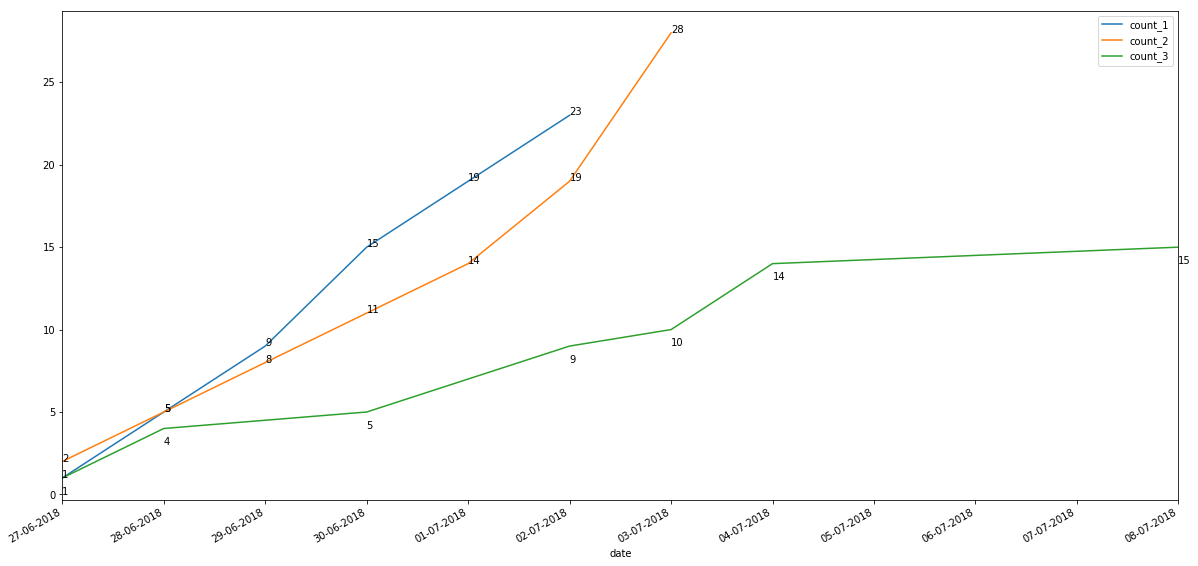

In [58]:
ax = cumsum1[['count_1']].plot(figsize=(20,10))
for label, x, y in zip(cumsum1['count_1'], cumsum1.index, cumsum1['count_1']):
    plt.annotate(label, xy=(x, y))
cumsum2[['count_2']].plot(ax=ax)
for label, x, y in zip(cumsum2['count_2'], cumsum2.index, cumsum2['count_2']):
    plt.annotate(label, xy=(x, y))
cumsum3[['count_3']].plot(ax=ax)
for label, x, y in zip(cumsum3['count_3'], cumsum3.index, cumsum3['count_3']):
    plt.annotate(label, xy=(x, y-1))

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.show()


In [72]:
index = pd.date_range(start = "2018-06-27", end = "2018-07-08", freq = "D")
df_traffic = pd.DataFrame(index=index)
df_traffic['count_1'] = cumsum1['count_1']
df_traffic['count_2'] = cumsum2['count_2']
df_traffic['count_3'] = cumsum3['count_3']
df_traffic.fillna(method='ffill', inplace=True)
df_traffic

,count_1,count_2,count_3
2018-06-27,1.0,2.0,1.0
2018-06-28,5.0,5.0,4.0
2018-06-29,9.0,8.0,4.0
2018-06-30,15.0,11.0,5.0
2018-07-01,19.0,14.0,5.0
2018-07-02,23.0,19.0,9.0
2018-07-03,23.0,28.0,10.0
2018-07-04,23.0,28.0,14.0
2018-07-05,23.0,28.0,14.0
2018-07-06,23.0,28.0,14.0


In [73]:
df_traffic.to_csv('Crowd/web_results/traffic_by_date.csv')

In [31]:
df_final = pd.concat([df_p1, df_p2, df_p3])

In [33]:
df_final.head()

,browser,created_at,ip,id,seed_id,user_id,date
15,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,2018-06-27 16:01:40.836,173.252.89.24,1,100004289191786,,2018-06-27
21,Mozilla/5.0 (Linux; Android 5.1.1; Alcatel_406...,2018-06-28 00:04:39.943,186.70.220.170,1,100008056815598,,2018-06-28
22,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2018-06-28 12:33:52.171,186.43.245.233,1,100026083432921,,2018-06-28
28,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2018-06-28 22:31:04.455,186.43.208.250,1,100016816027052,,2018-06-28
29,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,2018-06-28 22:59:14.835,201.238.179.129,1,100024828162161,,2018-06-28


In [34]:
df_final.to_csv('Crowd/web_results/traffic.csv', index=False)